In [31]:
import numpy as np
import pandas as pd

In [32]:
ascii_chars = [chr(i) for i in range(128)]

In [33]:
def auto_informacao(i):
    """
    Essa funçãto calcula a autoinformação de um determinado símbolo produzido por uma fonte X.
    :param i: Probabilidade de um símbolo ser transmitido pela fonte X.  
    :return: Informação em bits
    """
    return round(-1 * np.log2(i), 4)

In [34]:
## ou informação média
def entropia(c):
    """
    Essa função calcula a entrópia de uma fonte. A entrópia de uma fonte descreve a quantidade média de informação que uma fonte pode transmitir.
    :param c: A média ponderada da auto_informacao de todos os símbolos produzidos por uma fonte X.
    :return: Conjunto de probabilidade de todos os símbolos produzidos por uma fonte X. 
    """
    try:
        iter(c)
    except TypeError:
        raise Exception("c não é uma lista")
    if not c is np.ndarray:
        c = np.array(c)

    return round(sum(np.array(c) * np.log2(1 / np.array(c))), 4)

## Entrópia de um texto

In [35]:
texto = """Nullam blandit gravida consectetur. Sed placerat nec dui ut hendrerit. Praesent dictum euismod ipsum in pharetra. Nullam eu molestie velit. Nullam sit amet volutpat nibh, vel vulputate massa. Curabitur vehicula, nibh eget fermentum ultrices, nisi ante pellentesque nisi, ut auctor risus nulla nec eros. Sed urna felis, fringilla a aliquet eu, venenatis porttitor nisi. Vestibulum erat nisi, efficitur in congue id, tincidunt eu velit. Fusce quis dignissim turpis. Duis in risus felis."""

In [36]:
quantidade_caracteres = {}
for i in texto:
    if quantidade_caracteres.get(i) is None:
        quantidade_caracteres[i] = 1
    else:
        quantidade_caracteres[i] = quantidade_caracteres[i] + 1

probabilidade_caracteres = {}

for i in list(set(texto)):
    probabilidade_caracteres[i] = quantidade_caracteres[i] / len(texto)

In [37]:
entropia(list(probabilidade_caracteres.values()))

4.1852

## Entropia de uma imagem

In [38]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import io

In [39]:
img = Image.open("./gandalf.jpg")
img_cinza = img.convert('L')

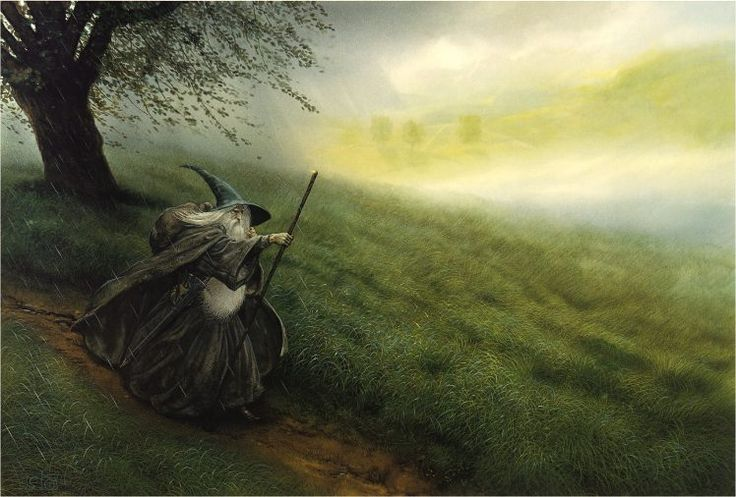

In [40]:
img

Precisamos agora calcular a entropia dessa imagem.  

In [41]:
probabilidade_pixel = []

quantidade_pixels = {}

pixels_flatten = np.array(img_cinza).flatten()

for i in pixels_flatten:
    if quantidade_pixels.get(i) is None:
        quantidade_pixels[i] = 1
    else:
        quantidade_pixels[i] = quantidade_pixels[i] + 1

possibilidade_pixels = {}

for i in np.unique(pixels_flatten):
    possibilidade_pixels[i] = quantidade_pixels[i] / len(pixels_flatten)

In [42]:
entropia(list(possibilidade_pixels.values()))

7.6493

Agora, irei calcular a entrópia de cada pixel dentro de um subconjunto 3x3 da imagem:

In [43]:
N = 10
arr = np.array(img_cinza)
E = np.array(arr)
shape = arr.shape
for row in range(shape[0]):
    for col in range(shape[1]):
        Lx=np.max([0,col-N])
        Ux=np.min([shape[1],col+N])
        Ly=np.max([0,row-N])
        Uy=np.min([shape[0],row+N])
        region=arr[Ly:Uy,Lx:Ux].flatten()
        E[row,col]=entropia(region)


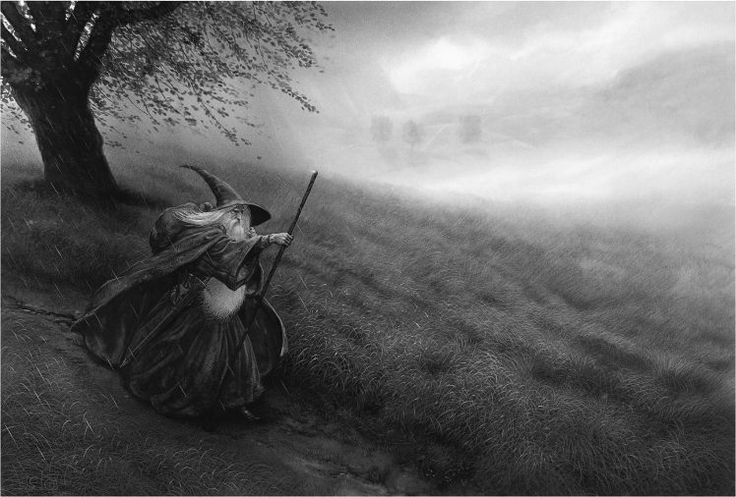

In [44]:
img_cinza

In [45]:
E

array([[  2, 133, 213, ..., 160, 160,  68],
       [ 41, 159, 241, ...,  48, 242,  61],
       [239,  82, 159, ..., 155,  31,  26],
       ...,
       [167, 116,  49, ..., 101, 218,  11],
       [ 63, 102, 216, ..., 159,  56, 169],
       [ 62, 193,  91, ..., 139,  73,  12]], dtype=uint8)

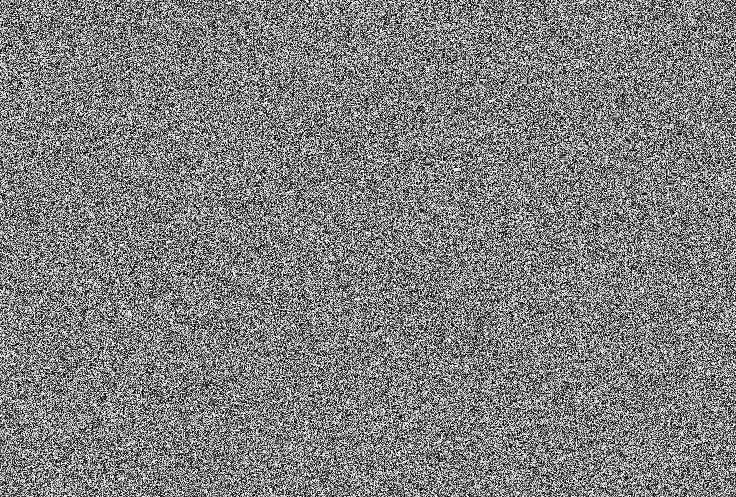

In [46]:
Image.fromarray(E)